In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

In [140]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")


In [141]:
df = pd.concat([train,test],axis = 0)
df = df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
print(" Shape = ",df.shape)


 Shape =  (1309, 13)


In [143]:

print("Nulls")
print(df.isnull().sum())


Nulls
index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [145]:
df.describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,369.478992,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,248.767105,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,327.000000,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,563.000000,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,890.000000,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [146]:
# Drop Cabin column
df=df.drop(columns=['Cabin'], axis = 1)

# Null

In [147]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.dropna(subset=['Survived'], inplace=True)


In [148]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



# Data Visualization

Text(0.5, 1.0, 'Number of survivals ')

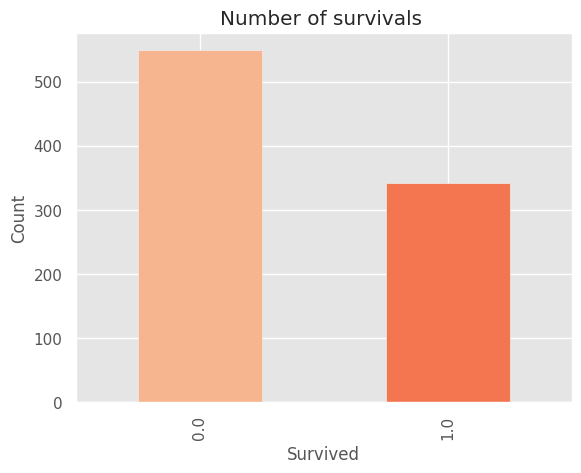

In [149]:
# No of survivals
plt.style.use("ggplot")
df['Survived'].value_counts().plot(kind="bar",color=sns.color_palette("rocket_r"))
plt.ylabel("Count")
plt.title("Number of survivals ")

<ipython-input-150-98688b685a62>:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Sex', hue='Survived', palette=sns.color_palette("rocket_r"))


<Axes: xlabel='Sex', ylabel='count'>

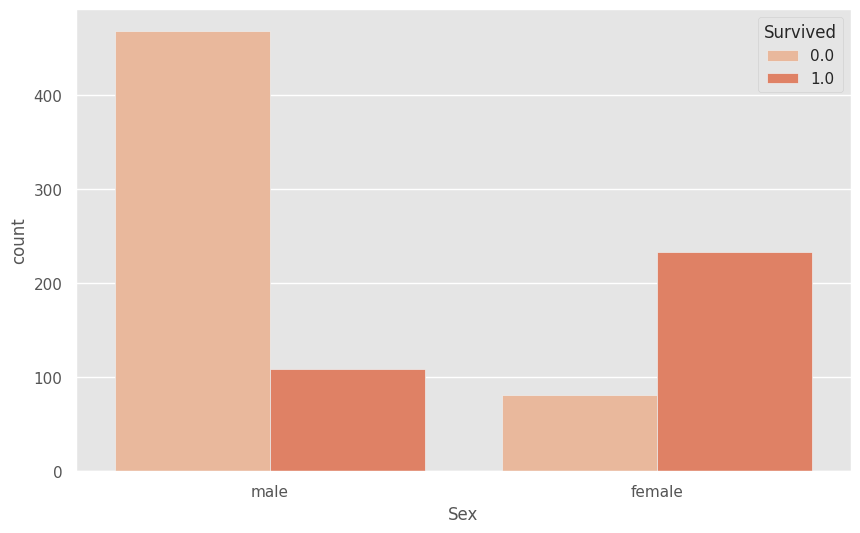

In [150]:

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette=sns.color_palette("rocket_r"))


Text(0.5, 1.0, 'Number of survivals ')

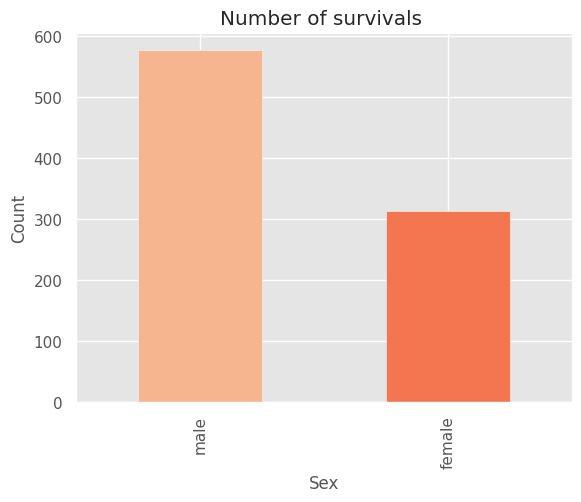

In [151]:
# No of Genders
plt.style.use("ggplot")
df['Sex'].value_counts().plot(kind="bar",color=sns.color_palette("rocket_r"))
plt.ylabel("Count")
plt.title("Number of survivals ")

# Label Encoder

In [152]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])




# Distribution

In [153]:
# drop name , index
df=df.drop(columns=['Name','index','PassengerId'])

In [154]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,1,22.0,1,0,523,7.2500,2
1,1.0,1,0,38.0,1,0,596,71.2833,0
2,1.0,3,0,26.0,0,0,669,7.9250,2
3,1.0,1,0,35.0,1,0,49,53.1000,2
4,0.0,3,1,35.0,0,0,472,8.0500,2


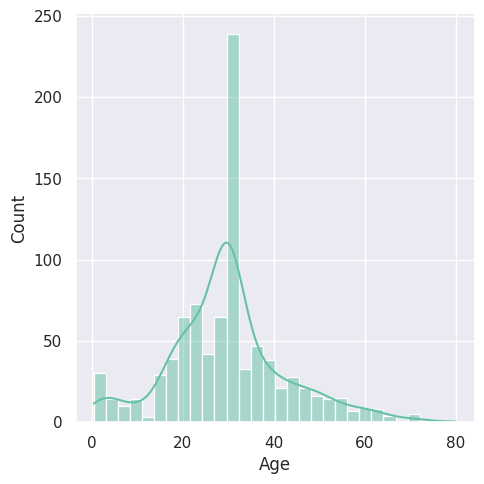

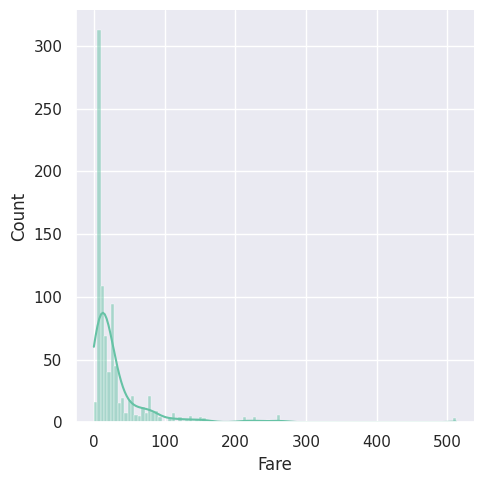

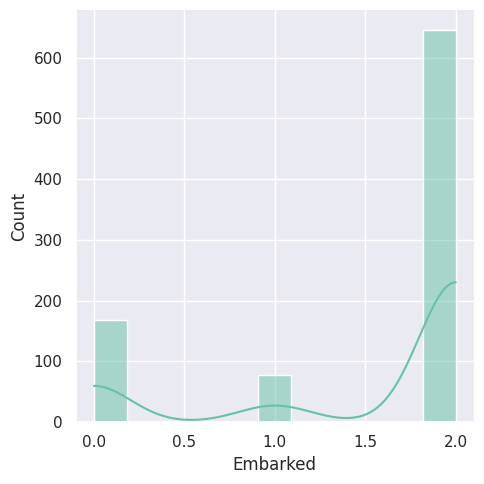

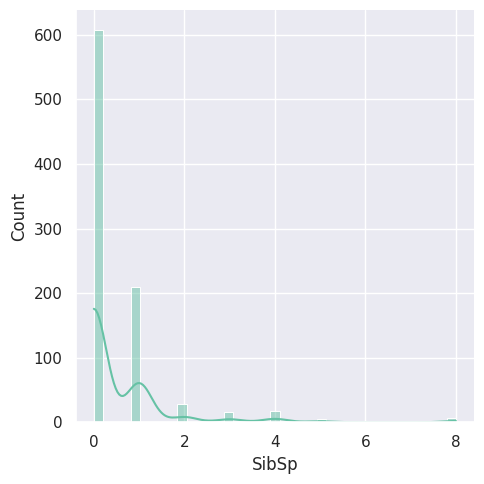

In [155]:
df_dis=df[['Age','Fare','Embarked','SibSp']]
for i in df_dis:
  sns.set_theme(palette='Set2')
  sns.displot(df_dis[i],kde=True)
  plt.show()

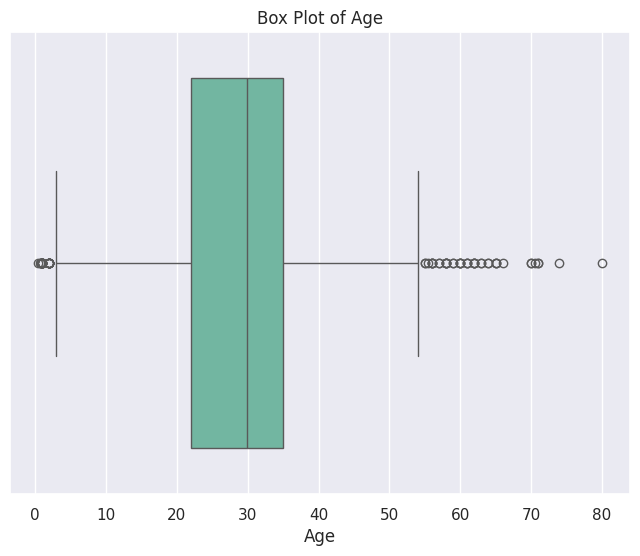

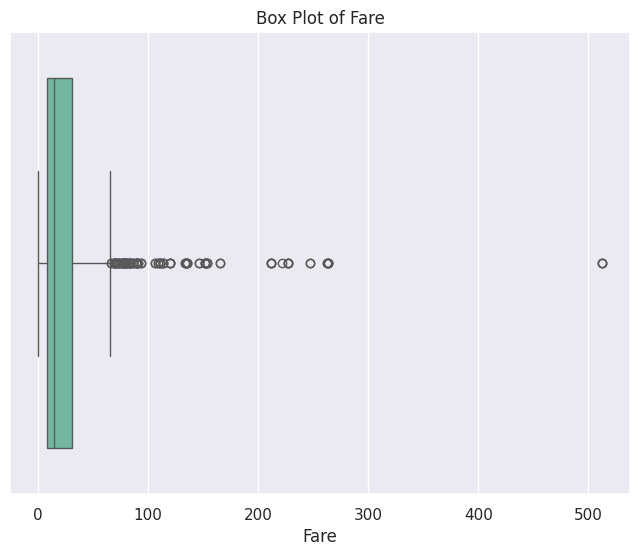

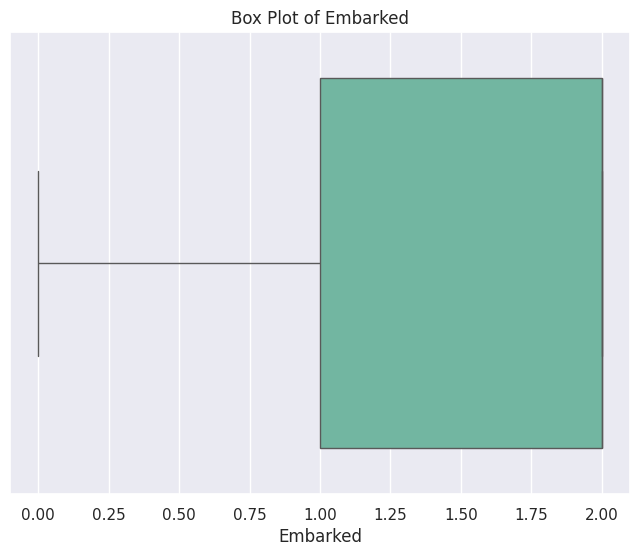

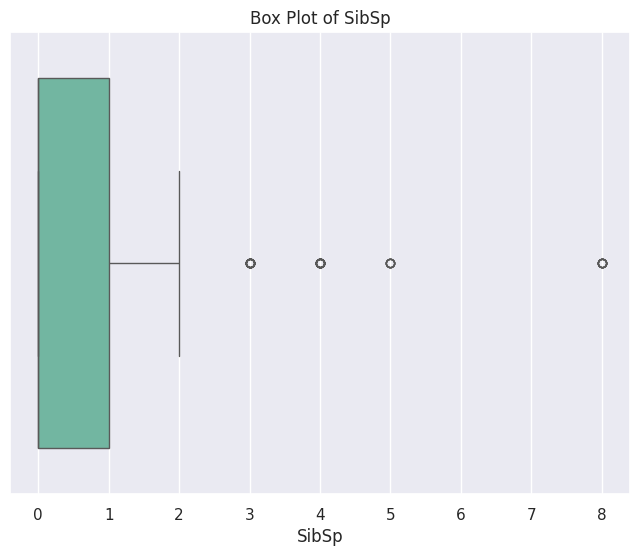

In [156]:
sns.set_theme(palette='Set2')

for column in df_dis.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_dis[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


In [157]:
# Handle fare column
df['Fare'] = np.log(df['Fare']+1)


In [158]:
df = df.astype(int)


In [159]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Ticket      int64
Fare        int64
Embarked    int64
dtype: object

In [160]:
# split
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

# Model building

In [161]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy Score:", accuracy)


Random Forest Accuracy Score: 0.7932960893854749


In [162]:
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("XGBoost Accuracy Score:", accuracy)


XGBoost Accuracy Score: 0.7988826815642458
